In [2]:
import pandas as pd


df = pd.read_csv('C:/git/mypitchfork/data/raw/pitchfork_data_vec.csv').dropna()
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,artist,album,genre,score,date,author,role,review,bnm,link,label,release_year,vec,persons,orgs
0,0,0,0,David Byrne,“…The Best Live Show of All Time” — NME EP,Rock,5.5,January 11 2019,Andy Beta,Contributor,"Viva Brother, Terris, Mansun, the Twang, Joe L...",0,https://pitchfork.com/reviews/albums/david-byr...,Nonesuch,2018.0,[ 2.00743582e-02 4.32062149e-03 -3.97242941e-...,"['Byrne', 'Viva Brother', 'David Byrne']","['NME', 'Joe Lean & the Jing Jang Jong', 'Talk..."
1,1,1,1,DJ Healer,Lost Lovesongs / Lostsongs Vol. 2,Electronic,6.2,January 11 2019,Chal Ravens,Contributor,"The Prince of Denmark—that is, the proper prin...",0,https://pitchfork.com/reviews/albums/dj-healer...,Planet Uterus,2019.0,[-4.87216674e-02 2.27765162e-02 3.77527922e-...,"['Qwazars', 'Lovesongs', 'Healer', 'Terence Tr...","['Olive', 'Traumprinz', 'Hamlet', 'Lostsongs',..."
2,2,2,2,Jorge Velez,Roman Birds,Electronic,7.9,January 10 2019,Philip Sherburne,Contributing Editor,"Jorge Velez has long been prolific, but that’s...",0,https://pitchfork.com/reviews/albums/jorge-vel...,Self-released,2019.0,[-3.11326385e-02 -7.01049790e-02 -5.15082432e-...,"['Lee Majors', 'Velez', 'Blade Runner', 'blipp...","['Bandcamp', 'Forza', 'Roman Birds']"
3,3,3,3,Chandra,Transportation EPs,Rock,7.8,January 10 2019,Andy Beta,Contributor,When the Avalanches returned in 2016 after an ...,0,https://pitchfork.com/reviews/albums/chandra-t...,Telephone Explosion,2018.0,[-1.46178022e-01 -9.55919847e-02 2.22037733e-...,"['Kate', 'Alexander', 'Oppenheim', 'Laurie And...","['New Yorkers ESG', 'the Mudd Club', 'Material..."
4,4,4,4,The Chainsmokers,Sick Boy,Electronic,3.1,January 9 2019,Larry Fitzmaurice,Contributor,We’re going to be stuck with the Chainsmokers ...,0,https://pitchfork.com/reviews/albums/the-chain...,"Disruptor,Columbia",2018.0,[-4.34820168e-02 -2.07125694e-02 3.81995440e-...,"['Chainsmokers', 'Halsey', 'Chainsmoker', 'Sic...","['Ultra', 'Purell', 'NGHTMRE', 'DJ Swivel', 'M..."


In [126]:
from transformers import pipeline


sentiment = pipeline('text-classification','finiteautomata/bertweet-base-sentiment-analysis',
                     tokenizer ="finiteautomata/bertweet-base-sentiment-analysis",
                     return_all_scores=True, truncation=True)
summarizer = pipeline('summarization',model='sshleifer/distilbart-cnn-12-6',
                      tokenizer = 'sshleifer/distilbart-cnn-12-6',
                      truncation= True)

def scorer(sentence):
    return (-sentiment(sentence)[0][0]['score'] + sentiment(sentence)[0][2]['score'])

def sumup(sentence):
    
    return summarizer(sentence)[0]['summary_text']


    


emoji is not installed, thus not converting emoticons or emojis into text. Please install emoji: pip3 install emoji


In [127]:
%%time
print(sumup(df['review'].iloc[0]))

 David Byrne is that rare legacy artist careful not to cash in on his longevity . Last year’s American Utopia, his first solo album in 14 years, might not have been his most formidable work . The twitchy, mid-1980s minor hit “This Must Be the Place (Naive Melody)” is better here .
CPU times: total: 49.4 s
Wall time: 14.9 s


In [128]:
%%time
print(scorer(df['review'].iloc[0]))


0.5698702649679035
CPU times: total: 2 s
Wall time: 631 ms


In [8]:
df['summary'] = df['review'].apply(sumup)  

KeyboardInterrupt: 

In [22]:
df['sentiment'] = df['review'].apply(score)

KeyboardInterrupt: 

In [59]:
import spacy
nlp  = spacy.load('en_core_web_lg')

def get_persons(text):
    persons = []
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            persons.append(ent.text)
    return list(set(persons))
            
def get_orgs(text):
    orgs = []
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'ORG':
            orgs.append(ent.text) 
    return list(set(orgs))
    

In [60]:
df['persons'] = df['review'].apply(get_persons)


In [62]:
df['orgs'] = df['review'].apply(get_orgs)

In [25]:
df.to_csv('C:/git/mypitchfork/data/raw/pitchfork_large.csv')

In [12]:
df = pd.read_csv('C:/git/mypitchfork/data/raw/pitchfork_large.csv').dropna(subset=['review'])
df['persons'] = df['persons'].str.strip('[]').str.replace("'", '').str.split(',')  
df['orgs'] = df['orgs'].str.strip('[]').str.replace("'", '').str.split(',')  
df['entities'] = df['persons'] + df['orgs']


In [13]:
for i in range(len(df)):
    entities = df['entities'].iloc[i]
    clean_entities = []
    for entity in entities:
        clean_entities.append(entity.strip().replace("’s", ""))
    df['entities'].iloc[i] = clean_entities
    


C:\Users\EmileESMAILI\AppData\Local\Temp\ipykernel_11460\376319601.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['entities'].iloc[i] = clean_entities


In [26]:
def n_intersections(a,b):
    return len(list(set(a) & set(b)))

In [31]:
%%time

import numpy as np
#score matrix to measure reviews with similar entities mentioned in them
score_matrix = np.ones((len(df), len(df)))

for i in range(len(df)):
    print(i/len(df))
    for j in range(i):
        entities_1 = df['entities'].iloc[i]
        entities_2 = df['entities'].iloc[j]
        score = n_intersections(entities_1, entities_2)
        score_matrix[i,j] = score
        score_matrix[j,i] = score
df = pd.DataFrame(score_matrix, columns=df['album'], index = df['album'])
df.to_csv('C:/git/mypitchfork/data/raw/ner_matrix.csv')

0.0
6.56254101588135e-05
0.000131250820317627
0.00019687623047644047
0.000262501640635254
0.00032812705079406746
0.00039375246095288093
0.00045937787111169446
0.000525003281270508
0.0005906286914293214
0.0006562541015881349
0.0007218795117469485
0.0007875049219057619
0.0008531303320645754
0.0009187557422233889
0.0009843811523822024
0.001050006562541016
0.0011156319726998293
0.0011812573828586428
0.0012468827930174563
0.0013125082031762699
0.0013781336133350834
0.001443759023493897
0.0015093844336527104
0.0015750098438115237
0.0016406352539703373
0.0017062606641291508
0.0017718860742879643
0.0018375114844467778
0.0019031368946055914
0.001968762304764405
0.002034387714923218
0.002100013125082032
0.0021656385352408452
0.0022312639453996586
0.0022968893555584723
0.0023625147657172856
0.0024281401758760993
0.0024937655860349127
0.0025593909961937264
0.0026250164063525397
0.002690641816511353
0.0027562672266701668
0.00282189263682898
0.002887518046987794
0.002953143457146607
0.00301876886730

0.027103294395589974
0.027168919805748787
0.0272345452159076
0.027300170626066413
0.027365796036225225
0.02743142144638404
0.027497046856542855
0.027562672266701668
0.02762829767686048
0.027693923087019293
0.027759548497178106
0.027825173907336923
0.027890799317495735
0.02795642472765455
0.02802205013781336
0.028087675547972174
0.028153300958130987
0.028218926368289803
0.028284551778448616
0.02835017718860743
0.028415802598766242
0.028481428008925055
0.028547053419083868
0.028612678829242684
0.028678304239401497
0.02874392964956031
0.028809555059719123
0.028875180469877935
0.028940805880036752
0.029006431290195565
0.029072056700354378
0.02913768211051319
0.029203307520672003
0.029268932930830816
0.029334558340989633
0.029400183751148445
0.02946580916130726
0.02953143457146607
0.029597059981624884
0.0296626853917837
0.029728310801942513
0.029793936212101326
0.02985956162226014
0.029925187032418952
0.029990812442577765
0.03005643785273658
0.030122063262895394
0.030187688673054207
0.03025

0.053812836330227064
0.05387846174038588
0.05394408715054469
0.054009712560703506
0.054075337970862315
0.05414096338102113
0.05420658879117995
0.05427221420133876
0.054337839611497574
0.05440346502165638
0.0544690904318152
0.054534715841974016
0.054600341252132825
0.05466596666229164
0.05473159207245045
0.05479721748260927
0.05486284289276808
0.05492846830292689
0.05499409371308571
0.05505971912324452
0.055125344533403335
0.055190969943562145
0.05525659535372096
0.05532222076387978
0.05538784617403859
0.0554534715841974
0.05551909699435621
0.05558472240451503
0.055650347814673845
0.055715973224832654
0.05578159863499147
0.05584722404515028
0.0559128494553091
0.055978474865467906
0.05604410027562672
0.05610972568578554
0.05617535109594435
0.056240976506103164
0.056306601916261974
0.05637222732642079
0.056437852736579606
0.056503478146738416
0.05656910355689723
0.05663472896705604
0.05670035437721486
0.056765979787373674
0.056831605197532484
0.0568972306076913
0.05696285601785011
0.05702

0.08117863236645229
0.08124425777661111
0.08130988318676992
0.08137550859692873
0.08144113400708755
0.08150675941724636
0.08157238482740517
0.08163801023756398
0.0817036356477228
0.08176926105788161
0.08183488646804042
0.08190051187819924
0.08196613728835805
0.08203176269851686
0.08209738810867567
0.0821630135188345
0.0822286389289933
0.08229426433915212
0.08235988974931094
0.08242551515946975
0.08249114056962856
0.08255676597978738
0.08262239138994619
0.082688016800105
0.08275364221026381
0.08281926762042263
0.08288489303058144
0.08295051844074025
0.08301614385089907
0.08308176926105788
0.08314739467121669
0.0832130200813755
0.08327864549153433
0.08334427090169313
0.08340989631185194
0.08347552172201077
0.08354114713216958
0.08360677254232839
0.08367239795248721
0.08373802336264602
0.08380364877280483
0.08386927418296364
0.08393489959312246
0.08400052500328127
0.08406615041344008
0.0841317758235989
0.08419740123375771
0.08426302664391652
0.08432865205407533
0.08439427746423415
0.08445

0.10861005381283632
0.10867567922299515
0.10874130463315396
0.10880693004331277
0.10887255545347159
0.1089381808636304
0.10900380627378921
0.10906943168394803
0.10913505709410684
0.10920068250426565
0.10926630791442446
0.10933193332458328
0.10939755873474209
0.1094631841449009
0.10952880955505973
0.10959443496521853
0.10966006037537734
0.10972568578553615
0.10979131119569498
0.10985693660585379
0.1099225620160126
0.10998818742617142
0.11005381283633023
0.11011943824648904
0.11018506365664786
0.11025068906680667
0.11031631447696548
0.11038193988712429
0.11044756529728311
0.11051319070744192
0.11057881611760073
0.11064444152775955
0.11071006693791836
0.11077569234807717
0.11084131775823598
0.1109069431683948
0.11097256857855362
0.11103819398871242
0.11110381939887125
0.11116944480903006
0.11123507021918887
0.11130069562934769
0.1113663210395065
0.11143194644966531
0.11149757185982412
0.11156319726998294
0.11162882268014175
0.11169444809030056
0.11176007350045938
0.1118256989106182
0.1118

0.13604147525922036
0.13610710066937917
0.136172726079538
0.13623835148969682
0.13630397689985563
0.13636960231001444
0.13643522772017325
0.13650085313033206
0.13656647854049087
0.1366321039506497
0.1366977293608085
0.13676335477096732
0.13682898018112613
0.13689460559128494
0.13696023100144375
0.13702585641160256
0.1370914818217614
0.1371571072319202
0.13722273264207901
0.13728835805223782
0.13735398346239663
0.13741960887255544
0.13748523428271428
0.1375508596928731
0.1376164851030319
0.1376821105131907
0.13774773592334952
0.13781336133350833
0.13787898674366714
0.13794461215382597
0.13801023756398478
0.1380758629741436
0.1381414883843024
0.1382071137944612
0.13827273920462002
0.13833836461477883
0.13840399002493767
0.13846961543509648
0.1385352408452553
0.1386008662554141
0.1386664916655729
0.13873211707573171
0.13879774248589052
0.13886336789604936
0.13892899330620817
0.13899461871636698
0.1390602441265258
0.1391258695366846
0.1391914949468434
0.13925712035700222
0.1393227457671610

0.16360414752592203
0.16366977293608084
0.16373539834623965
0.1638010237563985
0.1638666491665573
0.1639322745767161
0.16399789998687492
0.16406352539703373
0.16412915080719254
0.16419477621735135
0.16426040162751018
0.164326027037669
0.1643916524478278
0.1644572778579866
0.16452290326814542
0.16458852867830423
0.16465415408846304
0.16471977949862188
0.16478540490878069
0.1648510303189395
0.1649166557290983
0.16498228113925711
0.16504790654941592
0.16511353195957476
0.16517915736973357
0.16524478277989238
0.1653104081900512
0.16537603360021
0.1654416590103688
0.16550728442052762
0.16557290983068645
0.16563853524084526
0.16570416065100407
0.16576978606116288
0.1658354114713217
0.1659010368814805
0.1659666622916393
0.16603228770179815
0.16609791311195696
0.16616353852211577
0.16622916393227458
0.16629478934243339
0.1663604147525922
0.166426040162751
0.16649166557290984
0.16655729098306865
0.16662291639322746
0.16668854180338627
0.16675416721354508
0.1668197926237039
0.1668854180338627
0.

0.19123244520278251
0.19129807061294132
0.19136369602310013
0.19142932143325897
0.19149494684341778
0.1915605722535766
0.1916261976637354
0.1916918230738942
0.19175744848405302
0.19182307389421183
0.19188869930437066
0.19195432471452947
0.19201995012468828
0.1920855755348471
0.1921512009450059
0.1922168263551647
0.19228245176532352
0.19234807717548236
0.19241370258564117
0.19247932799579998
0.19254495340595879
0.1926105788161176
0.1926762042262764
0.19274182963643524
0.19280745504659405
0.19287308045675286
0.19293870586691167
0.19300433127707048
0.1930699566872293
0.1931355820973881
0.19320120750754693
0.19326683291770574
0.19333245832786455
0.19339808373802336
0.19346370914818217
0.19352933455834098
0.1935949599684998
0.19366058537865863
0.19372621078881744
0.19379183619897625
0.19385746160913506
0.19392308701929387
0.19398871242945268
0.19405433783961148
0.19411996324977032
0.19418558865992913
0.19425121407008794
0.19431683948024675
0.19438246489040556
0.19444809030056437
0.194513715

0.21872949205932538
0.21879511746948418
0.218860742879643
0.2189263682898018
0.2189919936999606
0.21905761911011945
0.21912324452027826
0.21918886993043707
0.21925449534059588
0.2193201207507547
0.2193857461609135
0.2194513715710723
0.21951699698123114
0.21958262239138995
0.21964824780154876
0.21971387321170757
0.21977949862186638
0.2198451240320252
0.219910749442184
0.21997637485234284
0.22004200026250165
0.22010762567266046
0.22017325108281927
0.22023887649297808
0.22030450190313688
0.22037012731329572
0.22043575272345453
0.22050137813361334
0.22056700354377215
0.22063262895393096
0.22069825436408977
0.22076387977424858
0.22082950518440742
0.22089513059456622
0.22096075600472503
0.22102638141488384
0.22109200682504265
0.22115763223520146
0.22122325764536027
0.2212888830555191
0.22135450846567792
0.22142013387583673
0.22148575928599554
0.22155138469615435
0.22161701010631316
0.22168263551647197
0.2217482609266308
0.2218138863367896
0.22187951174694842
0.22194513715710723
0.22201076256

0.2460952880955506
0.2461609135057094
0.24622653891586824
0.24629216432602705
0.24635778973618586
0.24642341514634467
0.24648904055650347
0.24655466596666228
0.2466202913768211
0.24668591678697993
0.24675154219713874
0.24681716760729755
0.24688279301745636
0.24694841842761517
0.24701404383777398
0.2470796692479328
0.24714529465809162
0.24721092006825043
0.24727654547840924
0.24734217088856805
0.24740779629872686
0.24747342170888567
0.24753904711904448
0.24760467252920332
0.24767029793936213
0.24773592334952094
0.24780154875967975
0.24786717416983856
0.24793279957999736
0.2479984249901562
0.248064050400315
0.24812967581047382
0.24819530122063263
0.24826092663079144
0.24832655204095025
0.24839217745110906
0.2484578028612679
0.2485234282714267
0.24858905368158551
0.24865467909174432
0.24872030450190313
0.24878592991206194
0.24885155532222075
0.2489171807323796
0.2489828061425384
0.2490484315526972
0.24911405696285602
0.24917968237301483
0.24924530778317364
0.24931093319333245
0.2493765586

0.2739204620028875
0.2739860874130463
0.2740517128232051
0.274117338233364
0.2741829636435228
0.2742485890536816
0.2743142144638404
0.2743798398739992
0.27444546528415803
0.27451109069431684
0.27457671610447565
0.27464234151463446
0.27470796692479327
0.2747735923349521
0.2748392177451109
0.2749048431552697
0.27497046856542856
0.27503609397558737
0.2751017193857462
0.275167344795905
0.2752329702060638
0.2752985956162226
0.2753642210263814
0.2754298464365402
0.27549547184669904
0.27556109725685785
0.27562672266701665
0.27569234807717546
0.2757579734873343
0.2758235988974931
0.27588922430765195
0.27595484971781076
0.27602047512796957
0.2760861005381284
0.2761517259482872
0.276217351358446
0.2762829767686048
0.2763486021787636
0.2764142275889224
0.27647985299908123
0.27654547840924004
0.27661110381939885
0.27667672922955766
0.2767423546397165
0.27680798004987534
0.27687360546003414
0.27693923087019295
0.27700485628035176
0.2770704816905106
0.2771361071006694
0.2772017325108282
0.2772673579

0.3016800105000656
0.30174563591022446
0.3018112613203833
0.3018768867305421
0.3019425121407009
0.3020081375508597
0.3020737629610185
0.3021393883711773
0.30220501378133613
0.30227063919149494
0.30233626460165375
0.30240189001181256
0.30246751542197137
0.3025331408321302
0.30259876624228904
0.30266439165244785
0.30273001706260666
0.30279564247276547
0.3028612678829243
0.3029268932930831
0.3029925187032419
0.3030581441134007
0.3031237695235595
0.3031893949337183
0.30325502034387714
0.30332064575403594
0.30338627116419475
0.30345189657435356
0.30351752198451243
0.30358314739467124
0.30364877280483005
0.30371439821498886
0.30378002362514767
0.3038456490353065
0.3039112744454653
0.3039768998556241
0.3040425252657829
0.3041081506759417
0.3041737760861005
0.30423940149625933
0.30430502690641814
0.304370652316577
0.3044362777267358
0.3045019031368946
0.30456752854705343
0.30463315395721224
0.30469877936737105
0.30476440477752986
0.30483003018768867
0.3048956555978475
0.3049612810080063
0.3050

0.329702060637879
0.3297676860480378
0.3298333114581966
0.3298989368683554
0.32996456227851423
0.33003018768867304
0.33009581309883185
0.33016143850899066
0.3302270639191495
0.33029268932930833
0.33035831473946714
0.33042394014962595
0.33048956555978476
0.33055519096994357
0.3306208163801024
0.3306864417902612
0.33075206720042
0.3308176926105788
0.3308833180207376
0.3309489434308964
0.33101456884105523
0.33108019425121404
0.3311458196613729
0.3312114450715317
0.3312770704816905
0.33134269589184934
0.33140832130200815
0.33147394671216696
0.33153957212232577
0.3316051975324846
0.3316708229426434
0.3317364483528022
0.331802073762961
0.3318676991731198
0.3319333245832786
0.3319989499934375
0.3320645754035963
0.3321302008137551
0.3321958262239139
0.3322614516340727
0.33232707704423153
0.33239270245439034
0.33245832786454915
0.33252395327470796
0.33258957868486677
0.3326552040950256
0.3327208295051844
0.3327864549153432
0.332852080325502
0.3329177057356609
0.3329833311458197
0.33304895655597

0.3575272345452159
0.3575928599553747
0.3576584853655335
0.3577241107756923
0.35778973618585114
0.35785536159601
0.3579209870061688
0.3579866124163276
0.35805223782648643
0.35811786323664524
0.35818348864680405
0.35824911405696286
0.35831473946712167
0.3583803648772805
0.3584459902874393
0.3585116156975981
0.3585772411077569
0.3586428665179157
0.3587084919280745
0.3587741173382334
0.3588397427483922
0.358905368158551
0.3589709935687098
0.3590366189788686
0.35910224438902744
0.35916786979918625
0.35923349520934506
0.35929912061950386
0.3593647460296627
0.3594303714398215
0.3594959968499803
0.3595616222601391
0.35962724767029797
0.3596928730804568
0.3597584984906156
0.3598241239007744
0.3598897493109332
0.359955374721092
0.3600210001312508
0.36008662554140963
0.36015225095156844
0.36021787636172725
0.36028350177188606
0.36034912718204487
0.3604147525922037
0.3604803780023625
0.36054600341252135
0.36061162882268016
0.360677254232839
0.3607428796429978
0.3608085050531566
0.3608741304633154

0.385286783042394
0.3853524084525528
0.3854180338627116
0.3854836592728705
0.3855492846830293
0.3856149100931881
0.3856805355033469
0.3857461609135057
0.38581178632366453
0.38587741173382334
0.38594303714398215
0.38600866255414096
0.38607428796429977
0.3861399133744586
0.3862055387846174
0.3862711641947762
0.386336789604935
0.38640241501509387
0.3864680404252527
0.3865336658354115
0.3865992912455703
0.3866649166557291
0.3867305420658879
0.3867961674760467
0.38686179288620554
0.38692741829636434
0.38699304370652315
0.38705866911668196
0.3871242945268408
0.3871899199369996
0.38725554534715845
0.38732117075731726
0.38738679616747607
0.3874524215776349
0.3875180469877937
0.3875836723979525
0.3876492978081113
0.3877149232182701
0.3877805486284289
0.38784617403858773
0.38791179944874654
0.38797742485890535
0.38804305026906416
0.38810867567922297
0.38817430108938183
0.38823992649954064
0.38830555190969945
0.38837117731985826
0.3884368027300171
0.3885024281401759
0.3885680535503347
0.388633678

0.4130463315395721
0.41311195694973096
0.4131775823598898
0.4132432077700486
0.4133088331802074
0.4133744585903662
0.413440084000525
0.4135057094106838
0.41357133482084263
0.41363696023100144
0.41370258564116025
0.41376821105131906
0.41383383646147787
0.4138994618716367
0.4139650872817955
0.41403071269195435
0.41409633810211316
0.41416196351227197
0.4142275889224308
0.4142932143325896
0.4143588397427484
0.4144244651529072
0.414490090563066
0.4145557159732248
0.41462134138338363
0.41468696679354244
0.41475259220370125
0.41481821761386006
0.4148838430240189
0.41494946843417774
0.41501509384433655
0.41508071925449536
0.41514634466465417
0.415211970074813
0.4152775954849718
0.4153432208951306
0.4154088463052894
0.4154744717154482
0.415540097125607
0.41560572253576583
0.41567134794592464
0.41573697335608345
0.4158025987662423
0.4158682241764011
0.41593384958655993
0.41599947499671874
0.41606510040687755
0.41613072581703636
0.41619635122719517
0.416261976637354
0.4163276020475128
0.416393227

0.44087150544690906
0.44093713085706787
0.4410027562672267
0.4410683816773855
0.4411340070875443
0.4411996324977031
0.4412652579078619
0.44133088331802073
0.44139650872817954
0.44146213413833835
0.44152775954849716
0.44159338495865597
0.44165901036881483
0.44172463577897364
0.44179026118913245
0.44185588659929126
0.44192151200945007
0.4419871374196089
0.4420527628297677
0.4421183882399265
0.4421840136500853
0.4422496390602441
0.4423152644704029
0.44238088988056173
0.44244651529072054
0.44251214070087935
0.4425777661110382
0.442643391521197
0.44270901693135584
0.44277464234151465
0.44284026775167346
0.44290589316183226
0.4429715185719911
0.4430371439821499
0.4431027693923087
0.4431683948024675
0.4432340202126263
0.4432996456227851
0.44336527103294393
0.4434308964431028
0.4434965218532616
0.4435621472634204
0.4436277726735792
0.44369339808373803
0.44375902349389684
0.44382464890405565
0.44389027431421446
0.44395589972437327
0.4440215251345321
0.4440871505446909
0.4441527759548497
0.44421

0.46869667935424597
0.4687623047644048
0.4688279301745636
0.4688935555847224
0.4689591809948812
0.46902480640504
0.4690904318151988
0.46915605722535764
0.46922168263551645
0.4692873080456753
0.4693529334558341
0.46941855886599293
0.46948418427615174
0.46954980968631055
0.46961543509646936
0.46968106050662817
0.469746685916787
0.4698123113269458
0.4698779367371046
0.4699435621472634
0.4700091875574222
0.470074812967581
0.47014043837773983
0.4702060637878987
0.4702716891980575
0.4703373146082163
0.4704029400183751
0.47046856542853394
0.47053419083869275
0.47059981624885155
0.47066544165901036
0.4707310670691692
0.470796692479328
0.4708623178894868
0.4709279432996456
0.4709935687098044
0.4710591941199633
0.4711248195301221
0.4711904449402809
0.4712560703504397
0.4713216957605985
0.4713873211707573
0.47145294658091613
0.47151857199107494
0.47158419740123375
0.47164982281139256
0.47171544822155137
0.4717810736317102
0.471846699041869
0.4719123244520278
0.47197794986218666
0.4720435752723455

0.4965874786717417
0.4966531040819005
0.4967187294920593
0.4967843549022181
0.4968499803123769
0.4969156057225358
0.4969812311326946
0.4970468565428534
0.4971124819530122
0.49717810736317103
0.49724373277332984
0.49730935818348865
0.49737498359364746
0.49744060900380627
0.4975062344139651
0.4975718598241239
0.4976374852342827
0.4977031106444415
0.4977687360546003
0.4978343614647592
0.497899986874918
0.4979656122850768
0.4980312376952356
0.4980968631053944
0.4981624885155532
0.49822811392571204
0.49829373933587084
0.49835936474602965
0.49842499015618846
0.4984906155663473
0.4985562409765061
0.4986218663866649
0.49868749179682376
0.49875311720698257
0.4988187426171414
0.4988843680273002
0.498949993437459
0.4990156188476178
0.4990812442577766
0.4991468696679354
0.49921249507809423
0.49927812048825304
0.49934374589841185
0.49940937130857066
0.49947499671872947
0.4995406221288883
0.49960624753904714
0.49967187294920595
0.49973749835936476
0.49980312376952357
0.4998687491796824
0.49993437458

0.5251345320908256
0.5252001575009844
0.5252657829111432
0.525331408321302
0.5253970337314608
0.5254626591416196
0.5255282845517785
0.5255939099619372
0.5256595353720961
0.5257251607822548
0.5257907861924137
0.5258564116025726
0.5259220370127313
0.5259876624228902
0.5260532878330489
0.5261189132432078
0.5261845386533666
0.5262501640635254
0.5263157894736842
0.526381414883843
0.5264470402940018
0.5265126657041607
0.5265782911143194
0.5266439165244783
0.526709541934637
0.5267751673447959
0.5268407927549548
0.5269064181651135
0.5269720435752724
0.5270376689854311
0.52710329439559
0.5271689198057488
0.5272345452159076
0.5273001706260664
0.5273657960362252
0.527431421446384
0.5274970468565429
0.5275626722667016
0.5276282976768605
0.5276939230870193
0.5277595484971781
0.527825173907337
0.5278907993174957
0.5279564247276546
0.5280220501378133
0.5280876755479722
0.528153300958131
0.5282189263682898
0.5282845517784486
0.5283501771886074
0.5284158025987662
0.5284814280089251
0.5285470534190839
0

0.5536815855099094
0.5537472109200683
0.553812836330227
0.5538784617403859
0.5539440871505447
0.5540097125607035
0.5540753379708623
0.5541409633810211
0.5542065887911799
0.5542722142013388
0.5543378396114975
0.5544034650216564
0.5544690904318152
0.554534715841974
0.5546003412521329
0.5546659666622916
0.5547315920724505
0.5547972174826092
0.5548628428927681
0.5549284683029269
0.5549940937130857
0.5550597191232445
0.5551253445334033
0.5551909699435621
0.555256595353721
0.5553222207638798
0.5553878461740386
0.5554534715841974
0.5555190969943562
0.5555847224045151
0.5556503478146738
0.5557159732248327
0.5557815986349914
0.5558472240451503
0.555912849455309
0.5559784748654679
0.5560441002756267
0.5561097256857855
0.5561753510959444
0.5562409765061032
0.556306601916262
0.5563722273264208
0.5564378527365796
0.5565034781467384
0.5565691035568973
0.556634728967056
0.5567003543772149
0.5567659797873736
0.5568316051975325
0.5568972306076913
0.5569628560178501
0.5570284814280089
0.5570941068381677

0.5821630135188345
0.5822286389289933
0.5822942643391521
0.582359889749311
0.5824255151594697
0.5824911405696286
0.5825567659797873
0.5826223913899462
0.582688016800105
0.5827536422102638
0.5828192676204226
0.5828848930305814
0.5829505184407403
0.5830161438508991
0.5830817692610579
0.5831473946712167
0.5832130200813755
0.5832786454915343
0.5833442709016932
0.5834098963118519
0.5834755217220108
0.5835411471321695
0.5836067725423284
0.5836723979524872
0.583738023362646
0.5838036487728049
0.5838692741829636
0.5839348995931225
0.5840005250032813
0.5840661504134401
0.5841317758235989
0.5841974012337577
0.5842630266439165
0.5843286520540754
0.5843942774642341
0.584459902874393
0.5845255282845517
0.5845911536947106
0.5846567791048694
0.5847224045150282
0.5847880299251871
0.5848536553353458
0.5849192807455047
0.5849849061556635
0.5850505315658223
0.5851161569759811
0.5851817823861399
0.5852474077962987
0.5853130332064576
0.5853786586166163
0.5854442840267752
0.5855099094369339
0.58557553484709

0.6106444415277595
0.6107100669379184
0.6107756923480772
0.610841317758236
0.6109069431683948
0.6109725685785536
0.6110381939887124
0.6111038193988713
0.61116944480903
0.6112350702191889
0.6113006956293476
0.6113663210395065
0.6114319464496654
0.6114975718598241
0.611563197269983
0.6116288226801417
0.6116944480903006
0.6117600735004594
0.6118256989106182
0.611891324320777
0.6119569497309358
0.6120225751410946
0.6120882005512535
0.6121538259614122
0.6122194513715711
0.6122850767817298
0.6123507021918887
0.6124163276020476
0.6124819530122063
0.6125475784223652
0.6126132038325239
0.6126788292426828
0.6127444546528416
0.6128100800630004
0.6128757054731592
0.612941330883318
0.6130069562934768
0.6130725817036357
0.6131382071137944
0.6132038325239533
0.6132694579341121
0.6133350833442709
0.6134007087544298
0.6134663341645885
0.6135319595747474
0.6135975849849061
0.613663210395065
0.6137288358052237
0.6137944612153826
0.6138600866255414
0.6139257120357002
0.613991337445859
0.6140569628560179
0

0.6392571203570022
0.6393227457671611
0.6393883711773198
0.6394539965874787
0.6395196219976375
0.6395852474077963
0.6396508728179551
0.6397164982281139
0.6397821236382727
0.6398477490484316
0.6399133744585903
0.6399789998687492
0.640044625278908
0.6401102506890668
0.6401758760992257
0.6402415015093844
0.6403071269195433
0.640372752329702
0.6404383777398609
0.6405040031500197
0.6405696285601785
0.6406352539703373
0.6407008793804961
0.6407665047906549
0.6408321302008138
0.6408977556109726
0.6409633810211314
0.6410290064312902
0.641094631841449
0.6411602572516079
0.6412258826617666
0.6412915080719255
0.6413571334820842
0.6414227588922431
0.6414883843024018
0.6415540097125607
0.6416196351227195
0.6416852605328783
0.6417508859430372
0.641816511353196
0.6418821367633548
0.6419477621735136
0.6420133875836724
0.6420790129938312
0.64214463840399
0.6422102638141488
0.6422758892243077
0.6423415146344664
0.6424071400446253
0.642472765454784
0.6425383908649429
0.6426040162751018
0.6426696416852605


0.6678041737760861
0.6678697991862449
0.6679354245964038
0.6680010500065625
0.6680666754167214
0.6681323008268801
0.668197926237039
0.6682635516471978
0.6683291770573566
0.6683948024675154
0.6684604278776742
0.6685260532878331
0.6685916786979919
0.6686573041081507
0.6687229295183095
0.6687885549284683
0.6688541803386271
0.668919805748786
0.6689854311589447
0.6690510565691036
0.6691166819792623
0.6691823073894212
0.66924793279958
0.6693135582097388
0.6693791836198977
0.6694448090300564
0.6695104344402153
0.669576059850374
0.6696416852605329
0.6697073106706917
0.6697729360808505
0.6698385614910093
0.6699041869011682
0.6699698123113269
0.6700354377214858
0.6701010631316445
0.6701666885418034
0.6702323139519623
0.670297939362121
0.6703635647722799
0.6704291901824386
0.6704948155925975
0.6705604410027562
0.6706260664129151
0.6706916918230739
0.6707573172332327
0.6708229426433915
0.6708885680535503
0.6709541934637091
0.671019818873868
0.6710854442840267
0.6711510696941856
0.6712166951043445


0.69635122719517
0.6964168526053288
0.6964824780154876
0.6965481034256464
0.6966137288358052
0.696679354245964
0.6967449796561228
0.6968106050662817
0.6968762304764404
0.6969418558865993
0.6970074812967582
0.6970731067069169
0.6971387321170758
0.6972043575272345
0.6972699829373934
0.6973356083475521
0.697401233757711
0.6974668591678698
0.6975324845780286
0.6975981099881874
0.6976637353983463
0.697729360808505
0.6977949862186639
0.6978606116288226
0.6979262370389815
0.6979918624491404
0.6980574878592991
0.698123113269458
0.6981887386796167
0.6982543640897756
0.6983199894999343
0.6983856149100932
0.698451240320252
0.6985168657304108
0.6985824911405696
0.6986481165507284
0.6987137419608872
0.6987793673710461
0.6988449927812049
0.6989106181913637
0.6989762436015226
0.6990418690116813
0.6991074944218402
0.6991731198319989
0.6992387452421578
0.6993043706523165
0.6993699960624754
0.6994356214726342
0.699501246882793
0.6995668722929518
0.6996324977031106
0.6996981231132695
0.6997637485234283
0

0.724832655204095
0.7248982806142539
0.7249639060244126
0.7250295314345715
0.7250951568447302
0.7251607822548891
0.7252264076650479
0.7252920330752067
0.7253576584853655
0.7254232838955244
0.7254889093056831
0.725554534715842
0.7256201601260008
0.7256857855361596
0.7257514109463185
0.7258170363564772
0.7258826617666361
0.7259482871767948
0.7260139125869537
0.7260795379971124
0.7261451634072713
0.7262107888174301
0.7262764142275889
0.7263420396377477
0.7264076650479065
0.7264732904580654
0.7265389158682242
0.726604541278383
0.7266701666885418
0.7267357920987007
0.7268014175088594
0.7268670429190183
0.726932668329177
0.7269982937393359
0.7270639191494946
0.7271295445596535
0.7271951699698123
0.7272607953799711
0.72732642079013
0.7273920462002887
0.7274576716104476
0.7275232970206064
0.7275889224307652
0.727654547840924
0.7277201732510828
0.7277857986612416
0.7278514240714005
0.7279170494815592
0.7279826748917181
0.7280483003018768
0.7281139257120357
0.7281795511221946
0.7282451765323533


0.7533797086231789
0.7534453340333377
0.7535109594434966
0.7535765848536553
0.7536422102638142
0.7537078356739729
0.7537734610841318
0.7538390864942905
0.7539047119044494
0.7539703373146082
0.754035962724767
0.7541015881349259
0.7541672135450846
0.7542328389552435
0.7542984643654023
0.7543640897755611
0.7544297151857199
0.7544953405958787
0.7545609660060375
0.7546265914161964
0.7546922168263551
0.754757842236514
0.7548234676466727
0.7548890930568316
0.7549547184669905
0.7550203438771492
0.7550859692873081
0.7551515946974668
0.7552172201076257
0.7552828455177845
0.7553484709279433
0.7554140963381021
0.755479721748261
0.7555453471584197
0.7556109725685786
0.7556765979787373
0.7557422233888962
0.755807848799055
0.7558734742092138
0.7559390996193727
0.7560047250295314
0.7560703504396903
0.756135975849849
0.7562016012600079
0.7562672266701667
0.7563328520803255
0.7563984774904843
0.7564641029006431
0.7565297283108019
0.7565953537209608
0.7566609791311195
0.7567266045412784
0.756792229951437

0.781861136632104
0.7819267620422627
0.7819923874524216
0.7820580128625804
0.7821236382727392
0.782189263682898
0.7822548890930568
0.7823205145032156
0.7823861399133745
0.7824517653235332
0.7825173907336921
0.782583016143851
0.7826486415540097
0.7827142669641686
0.7827798923743273
0.7828455177844862
0.7829111431946449
0.7829767686048038
0.7830423940149626
0.7831080194251214
0.7831736448352802
0.783239270245439
0.7833048956555978
0.7833705210657567
0.7834361464759155
0.7835017718860743
0.7835673972962331
0.7836330227063919
0.7836986481165508
0.7837642735267095
0.7838298989368684
0.7838955243470271
0.783961149757186
0.7840267751673448
0.7840924005775036
0.7841580259876624
0.7842236513978212
0.78428927680798
0.7843549022181389
0.7844205276282977
0.7844861530384565
0.7845517784486153
0.7846174038587741
0.784683029268933
0.7847486546790917
0.7848142800892506
0.7848799054994093
0.7849455309095682
0.785011156319727
0.7850767817298858
0.7851424071400446
0.7852080325502034
0.7852736579603623
0.

0.8104081900511878
0.8104738154613467
0.8105394408715054
0.8106050662816643
0.810670691691823
0.8107363171019819
0.8108019425121407
0.8108675679222995
0.8109331933324583
0.8109988187426171
0.811064444152776
0.8111300695629348
0.8111956949730936
0.8112613203832524
0.8113269457934112
0.81139257120357
0.8114581966137289
0.8115238220238876
0.8115894474340465
0.8116550728442052
0.8117206982543641
0.8117863236645229
0.8118519490746817
0.8119175744848405
0.8119831998949993
0.8120488253051582
0.812114450715317
0.8121800761254758
0.8122457015356346
0.8123113269457934
0.8123769523559522
0.8124425777661111
0.8125082031762698
0.8125738285864287
0.8126394539965874
0.8127050794067463
0.812770704816905
0.8128363302270639
0.8129019556372228
0.8129675810473815
0.8130332064575404
0.8130988318676992
0.813164457277858
0.8132300826880168
0.8132957080981756
0.8133613335083344
0.8134269589184933
0.813492584328652
0.8135582097388109
0.8136238351489696
0.8136894605591285
0.8137550859692874
0.8138207113794461
0

0.8389552434702717
0.8390208688804305
0.8390864942905893
0.8391521197007481
0.839217745110907
0.8392833705210657
0.8393489959312246
0.8394146213413833
0.8394802467515422
0.839545872161701
0.8396114975718598
0.8396771229820187
0.8397427483921774
0.8398083738023363
0.8398739992124951
0.8399396246226539
0.8400052500328127
0.8400708754429715
0.8401365008531303
0.8402021262632892
0.8402677516734479
0.8403333770836068
0.8403990024937655
0.8404646279039244
0.8405302533140833
0.840595878724242
0.8406615041344009
0.8407271295445596
0.8407927549547185
0.8408583803648773
0.8409240057750361
0.8409896311851949
0.8410552565953537
0.8411208820055125
0.8411865074156714
0.8412521328258301
0.841317758235989
0.8413833836461478
0.8414490090563066
0.8415146344664655
0.8415802598766242
0.8416458852867831
0.8417115106969418
0.8417771361071007
0.8418427615172595
0.8419083869274183
0.8419740123375771
0.8420396377477359
0.8421052631578947
0.8421708885680536
0.8422365139782123
0.8423021393883712
0.84236776479853

0.8675022968893555
0.8675679222995144
0.8676335477096732
0.867699173119832
0.8677647985299908
0.8678304239401496
0.8678960493503084
0.8679616747604673
0.868027300170626
0.8680929255807849
0.8681585509909437
0.8682241764011025
0.8682898018112614
0.8683554272214201
0.868421052631579
0.8684866780417377
0.8685523034518966
0.8686179288620554
0.8686835542722142
0.868749179682373
0.8688148050925318
0.8688804305026906
0.8689460559128495
0.8690116813230083
0.8690773067331671
0.8691429321433259
0.8692085575534847
0.8692741829636436
0.8693398083738023
0.8694054337839612
0.8694710591941199
0.8695366846042788
0.8696023100144376
0.8696679354245964
0.8697335608347552
0.869799186244914
0.8698648116550728
0.8699304370652317
0.8699960624753905
0.8700616878855493
0.8701273132957081
0.8701929387058669
0.8702585641160258
0.8703241895261845
0.8703898149363434
0.8704554403465021
0.870521065756661
0.8705866911668197
0.8706523165769786
0.8707179419871374
0.8707835673972962
0.8708491928074551
0.8709148182176139

0.8960493503084395
0.8961149757185982
0.8961806011287571
0.8962462265389158
0.8963118519490747
0.8963774773592335
0.8964431027693923
0.8965087281795511
0.8965743535897099
0.8966399789998688
0.8967056044100276
0.8967712298201864
0.8968368552303452
0.896902480640504
0.8969681060506628
0.8970337314608217
0.8970993568709804
0.8971649822811393
0.897230607691298
0.8972962331014569
0.8973618585116157
0.8974274839217745
0.8974931093319333
0.8975587347420921
0.897624360152251
0.8976899855624098
0.8977556109725686
0.8978212363827274
0.8978868617928862
0.897952487203045
0.8980181126132039
0.8980837380233626
0.8981493634335215
0.8982149888436802
0.8982806142538391
0.8983462396639978
0.8984118650741567
0.8984774904843156
0.8985431158944743
0.8986087413046332
0.898674366714792
0.8987399921249508
0.8988056175351096
0.8988712429452684
0.8989368683554272
0.899002493765586
0.8990681191757448
0.8991337445859037
0.8991993699960624
0.8992649954062213
0.8993306208163802
0.8993962462265389
0.8994618716366978

0.9245307783173645
0.9245964037275233
0.9246620291376821
0.9247276545478409
0.9247932799579998
0.9248589053681585
0.9249245307783174
0.9249901561884761
0.925055781598635
0.9251214070087938
0.9251870324189526
0.9252526578291115
0.9253182832392702
0.9253839086494291
0.9254495340595879
0.9255151594697467
0.9255807848799055
0.9256464102900643
0.9257120357002231
0.925777661110382
0.9258432865205407
0.9259089119306996
0.9259745373408583
0.9260401627510172
0.9261057881611761
0.9261714135713348
0.9262370389814937
0.9263026643916524
0.9263682898018113
0.92643391521197
0.9264995406221289
0.9265651660322877
0.9266307914424465
0.9266964168526053
0.9267620422627642
0.9268276676729229
0.9268932930830818
0.9269589184932406
0.9270245439033994
0.9270901693135583
0.927155794723717
0.9272214201338759
0.9272870455440346
0.9273526709541935
0.9274182963643522
0.9274839217745111
0.9275495471846699
0.9276151725948287
0.9276807980049875
0.9277464234151463
0.9278120488253052
0.927877674235464
0.9279432996456228

0.9530122063262896
0.9530778317364483
0.9531434571466072
0.953209082556766
0.9532747079669248
0.9533403333770836
0.9534059587872424
0.9534715841974012
0.95353720960756
0.9536028350177188
0.9536684604278777
0.9537340858380365
0.9537997112481953
0.9538653366583542
0.9539309620685129
0.9539965874786718
0.9540622128888305
0.9541278382989894
0.9541934637091481
0.954259089119307
0.9543247145294658
0.9543903399396246
0.9544559653497834
0.9545215907599423
0.9545872161701011
0.9546528415802599
0.9547184669904187
0.9547840924005775
0.9548497178107364
0.9549153432208951
0.954980968631054
0.9550465940412127
0.9551122194513716
0.9551778448615303
0.9552434702716892
0.955309095681848
0.9553747210920068
0.9554403465021657
0.9555059719123244
0.9555715973224833
0.9556372227326421
0.9557028481428009
0.9557684735529597
0.9558340989631186
0.9558997243732773
0.9559653497834362
0.9560309751935949
0.9560966006037538
0.9561622260139125
0.9562278514240714
0.9562934768342302
0.956359102244389
0.9564247276545479


0.9815592597453734
0.9816248851555323
0.981690510565691
0.9817561359758499
0.9818217613860086
0.9818873867961675
0.9819530122063262
0.9820186376164851
0.9820842630266439
0.9821498884368027
0.9822155138469616
0.9822811392571204
0.9823467646672792
0.982412390077438
0.9824780154875968
0.9825436408977556
0.9826092663079145
0.9826748917180732
0.9827405171282321
0.9828061425383908
0.9828717679485497
0.9829373933587084
0.9830030187688673
0.9830686441790262
0.9831342695891849
0.9831998949993438
0.9832655204095025
0.9833311458196614
0.9833967712298202
0.983462396639979
0.9835280220501378
0.9835936474602966
0.9836592728704554
0.9837248982806143
0.983790523690773
0.9838561491009319
0.9839217745110906
0.9839873999212495
0.9840530253314084
0.9841186507415671
0.984184276151726
0.9842499015618847
0.9843155269720436
0.9843811523822024
0.9844467777923612
0.98451240320252
0.9845780286126788
0.9846436540228376
0.9847092794329965
0.9847749048431552
0.9848405302533141
0.984906155663473
0.9849717810736317
0

In [32]:
%%time
df = pd.read_csv('C:/git/mypitchfork/data/raw/pitchfork_large.csv').dropna(subset=['review'])
embedding_matrix = np.ones((384, len(df)))
#dumb formatting
df['vec'] = df['vec'].apply(lambda x: 
                       np.fromstring(
                           x.replace('\n','')
                            .replace('[','')
                            .replace(']','')
                            .replace('  ',' '), sep=' '))
   

CPU times: total: 5.88 s
Wall time: 6 s


In [45]:
embedding_matrix = np.array(list(df['vec'])).T
print(embedding_matrix)

[[ 0.02007436 -0.04872167 -0.03113264 ...  0.02686591 -0.03709109
  -0.04843232]
 [ 0.00432062  0.02277652 -0.07010498 ...  0.02156336 -0.00320104
  -0.0885722 ]
 [-0.03972429  0.03775279 -0.00515082 ...  0.01586349  0.07083356
   0.00656201]
 ...
 [-0.0929507  -0.05102262 -0.06958447 ... -0.03169483 -0.05398105
  -0.07105707]
 [ 0.04704992  0.01382509 -0.03201059 ... -0.00207414  0.01877132
  -0.015915  ]
 [-0.01386001 -0.01108543 -0.00995235 ... -0.03720958 -0.01110907
  -0.01963815]]


In [46]:
corr = pd.DataFrame(embedding_matrix,columns=df['album']).corr()
corr.to_csv('C:/git/mypitchfork/data/raw/corr_matrix.csv')

In [66]:
df_sample = df.sample(n=1000)

In [67]:
%%time
df_sample['summary'] = df_sample['review'].apply(sumup) 


CPU times: total: 13h 45min 4s
Wall time: 3h 50min 40s


In [119]:
%%time
df_sample['sentiment_full'] = df_sample['review'].apply(scorer)


CPU times: total: 1h 11min 15s
Wall time: 22min 18s


In [120]:
%%time
df_sample['sentiment_sumup'] = df_sample['summary'].apply(scorer)

CPU times: total: 46min 17s
Wall time: 14min 10s


<AxesSubplot:xlabel='sentiment_full', ylabel='score'>

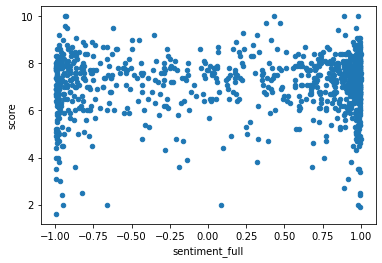

In [121]:
df_sample.plot.scatter('sentiment_full','score')

<AxesSubplot:xlabel='sentiment_sumup', ylabel='score'>

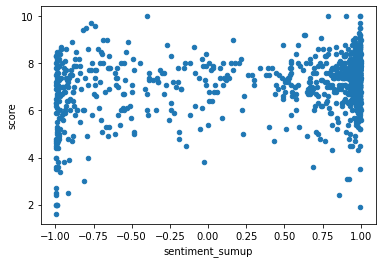

In [122]:
df_sample.plot.scatter('sentiment_sumup','score')

In [123]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    df_sample.sentiment_sumup,
    df_sample.score,
    test_size = 0.3,
    random_state=42
)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

print(r2_score(rfr.predict(X_test),y_test))



print(r2_score(ols.predict(X_test), y_test))





-1.4353819119605409
-12.691048834892412


In [73]:
df_sample.to_csv('C:/git/mypitchfork/data/raw/pitchfork_sample.csv')

In [81]:
ner_matrix = pd.read_csv('C:/git/mypitchfork/data/raw/ner_matrix.csv')

In [111]:
albums = []
matches = []

In [90]:
ner_matrix_small = ner_matrix.iloc[:4,:15]

In [91]:
ner_matrix_small.head()

,album,“…The Best Live Show of All Time” — NME EP,Lost Lovesongs / Lostsongs Vol. 2,Roman Birds,Transportation EPs,Sick Boy,Shadows of Death and Desire,Hoodie SZN,V I S C 0 9,"Ménage à Trois: Sextape Vol. 1, 2, 3",Starter Home,Singles Going Steady,Nothing New in the West,War in My Pen,Universalis
0,“…The Best Live Show of All Time” — NME EP,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Lost Lovesongs / Lostsongs Vol. 2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Roman Birds,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Transportation EPs,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
%%time
i=0
for album in ner_matrix['album']:
    i+=1
    print(i/len(ner_matrix))
    matches.append(ner_matrix.sort_values(by = album, ascending=False)['album'].to_list()[:6])

6.56254101588135e-05
0.000131250820317627
0.00019687623047644047
0.000262501640635254
0.00032812705079406746
0.00039375246095288093
0.00045937787111169446
0.000525003281270508
0.0005906286914293214
0.0006562541015881349
0.0007218795117469485
0.0007875049219057619


KeyboardInterrupt: 

In [109]:
ner_matrix_small.sort_values(by = 'Roman Birds', ascending=False)['album'].to_list()[:2]

['Roman Birds', '“…The Best Live Show of All Time” — NME EP']

In [132]:
%time

print(ner_matrix.sort_values(by = 'Revolver', ascending=False)['album'].to_list()[:6])

CPU times: total: 0 ns
Wall time: 0 ns
['The Beatles', 'Abbey Road', 'Let It Be... Naked', 'Magical Mystery Tour', 'Rubber Soul', 'Unfinished Music No. 1: Two Virgins']
